#  Astrocyte Neural Network with Dynamic Modulation

In [4]:
# Network w Planar Flower
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from icecream import ic

data = pd.read_csv('planar_flower.csv')[['y', 'x1', 'x2']]
data = np.array(data)
m, n = data.shape
np.random.seed(0)
# np.random.shuffle(data) # shuffle before splitting into dev and training sets
test_train_split = 50

data_dev = data[0:test_train_split].T # make sure each column is an data piece
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[test_train_split:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
_,m_train = X_train.shape

# Network w Planar Flower
from network import Network
sizes = [2, 10, 10, 1]

net = Network(sizes, output_discrete=False)

net.gradient_descent(X_train, Y_train, 0.1, 2000)

Iteration:  0
0.7685714285714286
Iteration:  10
0.7828571428571428
Iteration:  20
0.7885714285714286
Iteration:  30
0.7942857142857143
Iteration:  40
0.7971428571428572
Iteration:  50
0.8
Iteration:  60
0.8085714285714286
Iteration:  70
0.8142857142857143
Iteration:  80
0.8142857142857143
Iteration:  90
0.8114285714285714
Iteration:  100
0.8114285714285714
Iteration:  110
0.8142857142857143
Iteration:  120
0.8171428571428572
Iteration:  130
0.82
Iteration:  140
0.82
Iteration:  150
0.82
Iteration:  160
0.82
Iteration:  170
0.82
Iteration:  180
0.8228571428571428
Iteration:  190
0.8228571428571428
Iteration:  200
0.8228571428571428
Iteration:  210
0.8228571428571428
Iteration:  220
0.82
Iteration:  230
0.8171428571428572
Iteration:  240
0.8171428571428572
Iteration:  250
0.8171428571428572
Iteration:  260
0.8171428571428572
Iteration:  270
0.8171428571428572
Iteration:  280
0.82
Iteration:  290
0.82
Iteration:  300
0.8171428571428572
Iteration:  310
0.8171428571428572
Iteration:  320
0.

### MNIST database

In [1]:
# MNIST database
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from icecream import ic

data = pd.read_csv('train.csv')
data = np.array(data)
m, n = data.shape
np.random.seed(0)
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T # make sure each column is an data piece
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

### Vanilla Network Trained on MNIST Database

Iteration: 0, Accuracy: 0.1030, Time: 0.09s
Iteration: 10, Accuracy: 0.2522, Time: 0.59s
Iteration: 20, Accuracy: 0.3809, Time: 1.08s
Iteration: 30, Accuracy: 0.4444, Time: 1.57s
Iteration: 40, Accuracy: 0.4700, Time: 2.08s
Iteration: 50, Accuracy: 0.4930, Time: 2.56s
Iteration: 60, Accuracy: 0.5638, Time: 3.12s
Iteration: 70, Accuracy: 0.6118, Time: 3.64s
Iteration: 80, Accuracy: 0.6441, Time: 4.14s
Iteration: 90, Accuracy: 0.6742, Time: 4.60s
Iteration: 100, Accuracy: 0.7088, Time: 5.12s
Iteration: 110, Accuracy: 0.7415, Time: 5.62s
Iteration: 120, Accuracy: 0.7677, Time: 6.14s
Iteration: 130, Accuracy: 0.7872, Time: 6.63s
Iteration: 140, Accuracy: 0.8019, Time: 7.14s
Iteration: 150, Accuracy: 0.8127, Time: 7.61s
Iteration: 160, Accuracy: 0.8210, Time: 8.14s
Iteration: 170, Accuracy: 0.8280, Time: 8.63s
Iteration: 180, Accuracy: 0.8332, Time: 9.13s
Iteration: 190, Accuracy: 0.8390, Time: 9.60s
Iteration: 200, Accuracy: 0.8438, Time: 10.09s
Iteration: 210, Accuracy: 0.8489, Time: 10.5

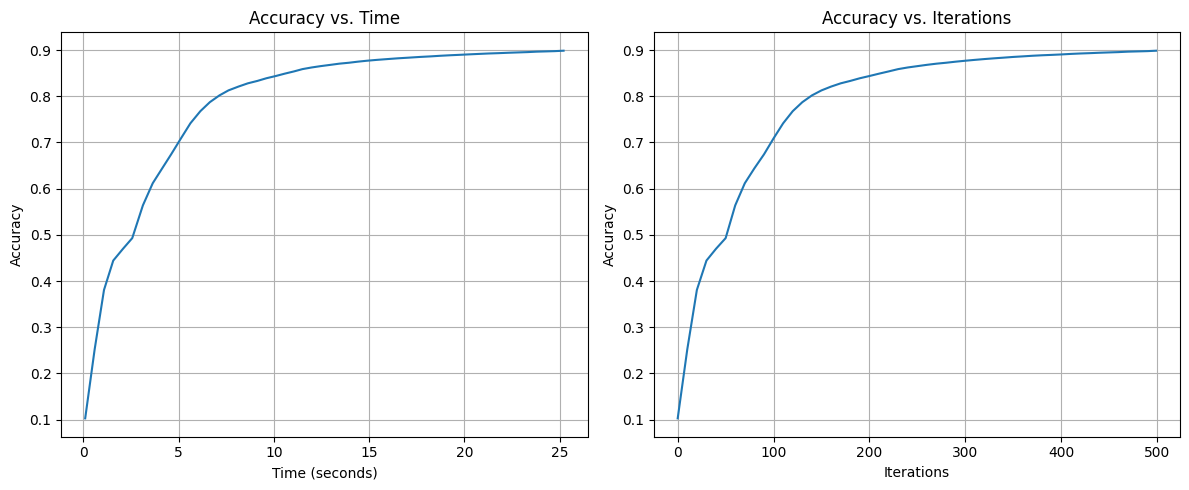

In [3]:
# Network w MNIST

from network import Network
sizes = [784, 10, 10]

net = Network(sizes, output_discrete=True)

net.train_with_visualization(X_train, Y_train, 0.1, 500, eval_interval=10)

In [3]:
evaluation_results = net.evaluate(X_dev, Y_dev)

print("Evaluation Results:")
print(f"Accuracy: {evaluation_results['accuracy']:.5f}")
print(f"Precision: {evaluation_results['precision']:.4f}")
print(f"Recall: {evaluation_results['recall']:.4f}")
print(f"F1 Score: {evaluation_results['f1_score']:.4f}")

Evaluation Results:
Accuracy: 0.8080
Precision: 0.8078
Recall: 0.8083
F1 Score: 0.8071


### Astrocyte Network Trained on MNIST Database

Iteration: 0, Accuracy: 0.7367, Time: 0.30s
Iteration: 10, Accuracy: 0.8613, Time: 3.03s
Iteration: 20, Accuracy: 0.8749, Time: 5.71s
Iteration: 30, Accuracy: 0.8825, Time: 8.40s
Iteration: 40, Accuracy: 0.8870, Time: 11.08s
Iteration: 50, Accuracy: 0.9011, Time: 13.78s
Iteration: 60, Accuracy: 0.9122, Time: 16.49s
Iteration: 70, Accuracy: 0.9209, Time: 19.18s
Iteration: 80, Accuracy: 0.9249, Time: 21.86s
Iteration: 90, Accuracy: 0.9271, Time: 24.58s
Iteration: 100, Accuracy: 0.9285, Time: 27.35s
Iteration: 110, Accuracy: 0.9296, Time: 30.01s
Iteration: 120, Accuracy: 0.9307, Time: 32.71s
Iteration: 130, Accuracy: 0.9313, Time: 35.42s
Iteration: 140, Accuracy: 0.9319, Time: 38.40s
Iteration: 150, Accuracy: 0.9323, Time: 41.05s
Iteration: 160, Accuracy: 0.9330, Time: 43.82s
Iteration: 170, Accuracy: 0.9330, Time: 46.53s
Iteration: 180, Accuracy: 0.9334, Time: 49.24s
Iteration: 190, Accuracy: 0.9337, Time: 51.95s
Iteration: 200, Accuracy: 0.9343, Time: 54.63s
Iteration: 210, Accuracy: 0.

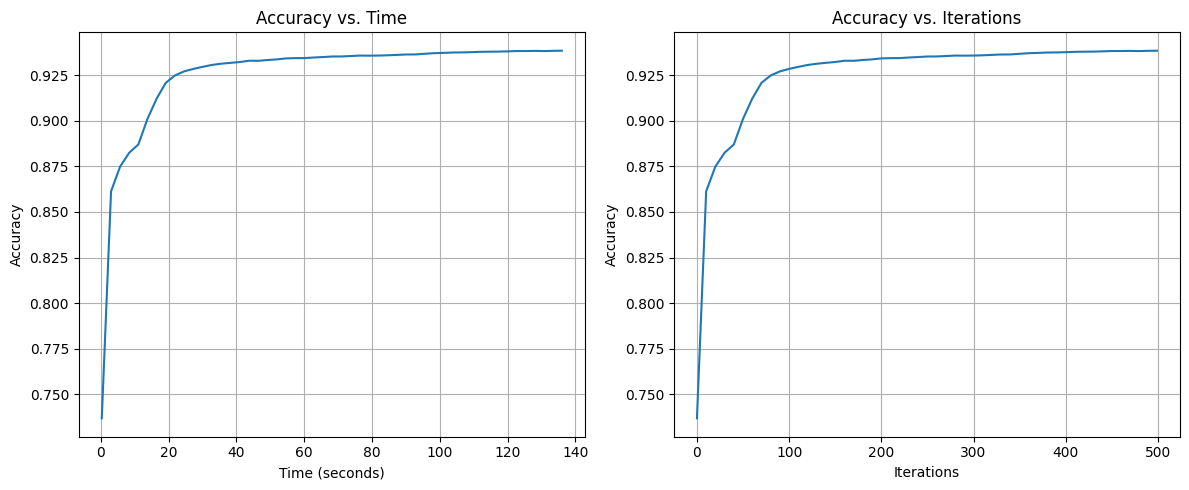

In [2]:
# AstrocyteNN MNIST

from ann import AstrocyteNetwork
sizes = [784, 10, 10]  # Example network architecture

astrocyte_net = AstrocyteNetwork(sizes, astrocyte_density=1.0, initial_threshold=0.5, initial_effect=0.1)

# # Train the network
# # astrocyte_net.astrocyte_thresholds
astrocyte_net.train_with_visualization(X_train, Y_train, alpha=0.015, iterations=500)

# # Visualize astrocyte parameters
# # astrocyte_net.plot_astrocyte_params()

In [3]:
evaluation_results = astrocyte_net.evaluate(X_dev, Y_dev)

print("Evaluation Results:")
print(f"Accuracy: {evaluation_results['accuracy']:.5f}")
print(f"Precision: {evaluation_results['precision']:.4f}")
print(f"Recall: {evaluation_results['recall']:.4f}")
print(f"F1 Score: {evaluation_results['f1_score']:.4f}")

Evaluation Results:
Accuracy: 0.91500
Precision: 0.9173
Recall: 0.9160
F1 Score: 0.9153


In [4]:
from dynamic_ann import AstrocyteNetwork
sizes = [784, 10, 10]  # Example network architecture

astrocyte_net = AstrocyteNetwork(sizes, astrocyte_density=1.0, initial_threshold=0.5, initial_effect=0.1)

# astrocyte_net.astrocyte_thresholds[0][0][0]
# astrocyte_net.forward_prop(X_train[:, 0])
# # Train the network

astrocyte_net.gradient_descent(X_train, Y_train, alpha=0.015, iterations=500)

# # Visualize astrocyte parameters
# # astrocyte_net.plot_astrocyte_params()

Iteration:  0
0.811219512195122
Iteration:  10
0.9247317073170732
Iteration:  20
0.9371951219512196
Iteration:  30
0.9440731707317073
Iteration:  40
0.9477073170731707
Iteration:  50
0.9500975609756097


KeyboardInterrupt: 

In [7]:
# np.argmax(astrocyte_net.forward_prop(X_dev[:, 49])), Y_dev[49]
astrocyte_net.astrocyte_thresholds

NameError: name 'astrocyte_net' is not defined

### Vanilla Network Trained on UCI Adult Database

In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

# y = data['income'].map({'>50K': 1, '<=50K': 0})

# Define categorical and numerical columns
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Convert to dense array if your neural network doesn't support sparse matrices
X_processed = X_processed.toarray()

# Now X_processed and y are ready to be used in your neural network
type(X_processed)

numpy.ndarray

In [19]:
# Assuming you've already defined your Network class

# Initialize the network
# The input size should match the number of columns in X_processed
input_size = X_processed.shape[1]
net = Network([input_size, 64, 32, 1], output_discrete=False)

# Train the network
net.gradient_descent(X_processed.T, y, alpha=0.01, iterations=1000)

# You may want to split your data into train and test sets before training

ValueError: Unable to coerce to DataFrame, shape must be (48842, 1): given (1, 48842)